# 1 算法概述

我们每天都做着各种形形色色的决策——周末怎么嗨、是否买下衣服、出差选哪种交通工具等等，这些决策的过程我们用图形的形式表现出来就是一种类似树形的结构，将这种决策思想应用到机器学习算法领域，那就是我们本文要说的决策树算法。

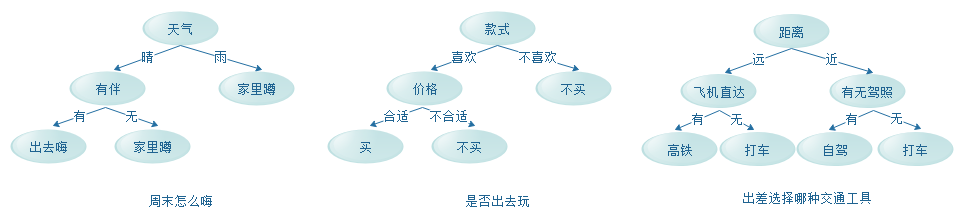

决策树算法属于有监督学习算法的一员，在决策前需要先根据先验数据进行学习，构建并训练出一个决策树模型。决策树模型中每一个非叶子结点代表着一个特征属性，其下每一个分支都代表对该特征属性值域的不同取值划分，每一个叶子结点代表一个输出分类。应用模型进行决策时，从第一个非叶子结点（根节点）开始，根据特征属性和值选择分支直到最后的叶子结点，最后的叶子结点所代表的分类就是最终的决策结果。

决策树算法的本质是根据训练数据进行学习，构建一颗最优的决策树。之所以说最优，是因为对于同一个数据集，在不同的策略下可能构造出不一样的决策树。假设我们有如下一个数据集，用于判断同事是否是程序员（纯属瞎编娱乐，请勿深究）：

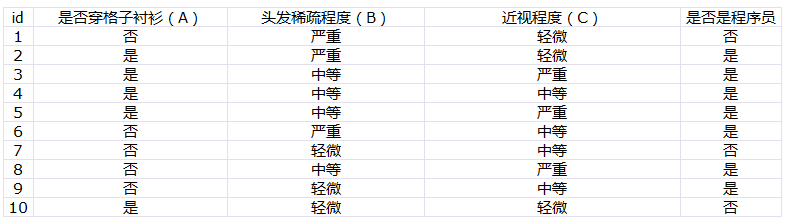

我们可能构建出下面这棵树：

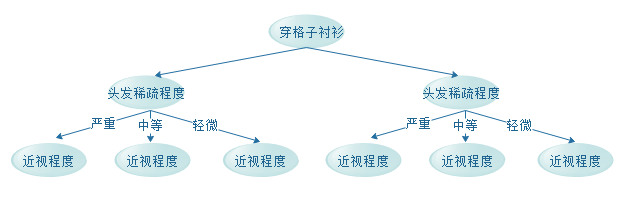

也有可能构建出下面这棵树：

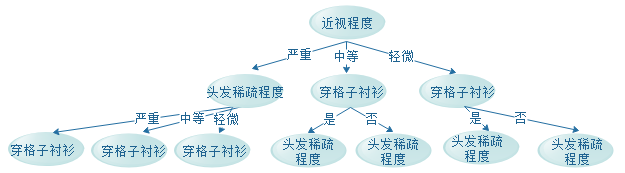

甚至还有其他结构的决策树。对于不同结构的决策树，当然对决策的效率，甚至是准确率都是有所影响，那么，怎么构建一颗最优的决策树呢？  

我们知道，决策树是一种递归的逻辑结构，其每一个节点都可以作为一棵树，那么，我们只需要做到每个节点最优，就可以保证整个决策树最优。所以，对于构建一颗决策树，如何选择最优分裂特征属性，即从当前数据的特征中选择一个特征属性作为当前节点的划分标准，使分裂后各子树的样本子集的“纯度”越来越高。

在决策树算法中，根据选择最优分裂特征属性的策略不同，分为多种决策树算法，最经典的就是ID3、C4.5、CART，本文主要ID3和C4.5两种分类树，CART由于其特殊性，将在下一篇博客中介绍。

# 2 ID3决策树算法

之前说过，选择分裂特征属性时，分裂后的样本子集“纯度”越高越好，对于这个纯度，有一个专门的概念用于量化衡量——信息熵(entropy)。

信息熵是信息论中的概念，通常简称为熵，表示随机变量不确定性或者说混乱程度。设当前样本集合$X$包含$n$个分类，${p_i}$表示第$k$类所在的比例，则集合$X$的熵定义为：

$$Ent(X) =  - \sum\limits_{i = 1}^n {{p_i}} lo{g_2}{p_i}$$

$Ent(X)$的值越趋近于0，表示$D$的纯度越高，越趋近于1，表示$D$的纯度越低。

在ID3决策树算法中，采用信息增益作为选择最优分裂特征属性的标准。假设$A$是$X$中的一个离散型特征属性，包含$L$个可能取值，则根据属性$A$对$X$进行分裂可产生$L$个分支，第$i$个分支上获得的样本子集记为${X_i}$，我们可以根据上式计算出每一个分支下获得的分裂子集${X_i}$的熵，由于各子集${X_i}$的样本数量不同，我们在熵的基础上添加一个权重${{|{X_i}|} \over {|X|}}$，也就是说，样本子集中样本数量越多，所占权重越大，以特征属性$A$作为分裂节点后的熵为：

$$En{t_A}(X) =  - \sum\limits_{i = 1}^L {{{|{X_i}|} \over {|X|}}Ent({X_i})} $$

特征属性$A$的信息增益定义为：

$$Gain(A) = Ent(X) - En{t_A}(X)$$

属性$A$的信息增益$Gain(A)越大，表示使用属性$A$作为当前数据集的分裂节点对数据集“纯度”的提升越大。ID3算法选择最优分裂特征属性的策略就是每次选择信息增益最大的一个特征属性最为当前数据集的分裂特征属性，然后对每一个分支节点的数据子集重复迭代这一策略，直到数据子集都属于同一分类或者所有特征属性都已用完。

我们已上面表格中用于判断同事是否是程序员的数据为例，通过实例感受一下ID3算法。

首先计算整个数据集的熵：

$$Ent(X) =  - ({7 \over {10}} \times lo{g_2}{7 \over {10}} + {3 \over {10}} \times lo{g_2}{3 \over {10}}) = 0.88129$$

采用属性$A$（是否穿格子衬衫）的作为分裂特征属性后的熵为：

$$En{t_A}(X) =  - \{ {5 \over {10}} \times ({4 \over 5} \times lo{g_2}{4 \over 5} + {1 \over 5} \times lo{g_2}{1 \over 5}){\rm{ + }}{5 \over {10}} \times ({3 \over 5} \times lo{g_2}{3 \over 5} + {2 \over 5} \times lo{g_2}{2 \over 5})\}  = 0.84645$$

那么，属性$A$的信息增益为：

$$Gain(A) = 0.88129 - 0.84645 = 0.034840$$

用同样的方法可以计算出属性$B$（头发稀疏程度）和属性$C$（近视程度）的信息增益分别为：

$$En{t_B}(X) =  - \{ {3 \over {10}} \times ({2 \over 3} \times lo{g_2}{2 \over 3}{\rm{ + }}{1 \over 3} \times lo{g_2}{1 \over 3}) + {4 \over {10}} \times ({4 \over 4} \times lo{g_2}{4 \over 4}{\rm{ + }}0){\rm{ + }}{3 \over {10}} \times ({1 \over 3} \times lo{g_2}{1 \over 3}{\rm{ + }}{2 \over 3} \times lo{g_2}{2 \over 3})\}  = 0.612197$$

$$Gain(B) = 0.88129 - 0.61220 = 0.269093$$

$$En{t_C}(X) =  - \{ {3 \over {10}} \times ({3 \over 3} \times lo{g_2}{3 \over 3}{\rm{ + }}0) + {4 \over {10}} \times ({3 \over 4} \times lo{g_2}{3 \over 4}{\rm{ + }}{1 \over 4} \times lo{g_2}{1 \over 4}){\rm{ + }}{3 \over {10}} \times ({1 \over 3} \times lo{g_2}{1 \over 3}{\rm{ + }}{2 \over 3} \times lo{g_2}{2 \over 3})\}  = 0.6$$

$$Gain(C) = 0.88129 - 0.6 = 0.28129$$

对比三个属性的信息增益，显然属性$C$（近视程度）具有最大的信息增益，因此使用属性$C$作为当前分裂特征属性。

使用属性$C$作为当前分支节点后，每个分支产生新的数据子集，对每个子集重复上述步骤计算各特征属性的信息增益，选择最优分裂特征属性，直到数据子集都属于同一分类或者所有特征属性都已用完，整个决策树就算构建好了。

ID3算法是经典的决策树构建算法，结构简单清晰、灵活方便，但存在以下不足：

（1）在选择最优分裂特征属性时，偏好于多取值的特征属性。在选择最优分裂特征属性时，某特征属性的取值越多，分裂后的数据子集就越多，子集中类别相对而言就可能更少，数据“纯度”更高，信息增益更大，所以更有可能被选为当前分裂节点的特征属性。如果还不理解，那么，我们将这种情况极端化，数据集中都有一个ID属性，如果以ID作为分裂特征属性计算信息增益时，每一条数据都是一个分裂，那么多有分裂的分裂后的熵都是0，多以信息增益一定是1，一定会被选为最优分裂特征属性。

（2）不能处理连续型特征属性。

（3）没有树剪枝过程，容易发生过拟合现象。

针对ID3决策树算法的不足，有大能进行优化改进，于是就有了C4.5决策树算法。

# 3 C4.5决策树算法

C4.5决策树算法是在ID3决策树算法基础上发展而来，所以总体而言，两者是极其相似的。当然，既然说发展，就肯定有更进一步改进的内容。

**（1）信息增益率**

上文提过，ID3决策树算法在选择最优分裂特征属性时，偏好于多取值的特征属性，针对这一问题，C4.5决策树算法不再以信息增益作为选择选最优分裂特征属性的标准，而在选择在信息增益基础上更进一步计算获得的信息增益率作为选择最优分裂特征属性的标准。

在介绍信息增益率之前，还得说说“内部信息”的定义:

$$Instr\_inf{o_A} =  - \sum\limits_{i = 1}^L {{{|{X_i}|} \over {|X|}}} lo{g_2}({{|{X_i}|} \over {|X|}})$$

内部信息$Instr\_inf{o_A}$用于度量属性$A$进行分裂时分支的数量信息和尺寸信息，属性$A$的取值数量越多，分支越多$Instr\_inf{o_A}$就越大，${1 \over {Instr\_inf{o_A}}}$就越小，因此可以将${1 \over {Instr\_inf{o_A}}}$作为一个惩罚因子与信息增益相结合，于是有了信息增益率：

$$Gain\_ratio(A) = {{Gain(A)} \over {Instr\_inf{o_A}}}$$

用信息增益率替代信息增益作为最优分裂特征属性的选择标准，就可以很好的解决ID3决策树算法在选择最优分裂特征属性时，偏好于多取值的特征属性的问题。

**（2）连续型特征属性处理**

对于连续型特征属性，C4.5算法采用的策略是采用二分法将特征属性离散化。假设数据集$X$中属性$A$有$n$个不同取值，我们先将其按升序排序得到集合$\{ {a_1},{a_2}, \cdots ,{a_n}\} $，将每两个相邻元素的中间点$t = {{{a_i} + {a_{i + 1}}} \over 2}$看做潜在分裂点，于是有$n-1$个潜在的分裂点，每一个潜在分裂点都可以将数据集划分为不大于$t$和大于$t$两类，对每一个潜在分裂点计算信息增益，然后选择信息增益最大的一个潜在分裂点作为当前的最优划分点。

在计算各特征属性的信息增益率时，就可以用最优划分点二分离散化之后的$A$属性来计算信息增益率。

对于缺失值处理和树剪枝，又是一个大话题了，可以参考[这篇文档](https://blog.csdn.net/zhihua_oba/article/details/70632622)，本文不再叙述。